# Recommender system

### Library import

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [58]:
movies = "../lab_data/movies.csv"
ratings = "../lab_data/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings = pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})

### EDA

#### Info and describe

In [59]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [60]:
df_ratings.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [61]:
df_movies.info(), df_movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB


(None,
              movieId
 count   58098.000000
 mean   111919.516197
 std     59862.660956
 min         1.000000
 25%     72437.750000
 50%    126549.000000
 75%    161449.500000
 max    193886.000000)

In [62]:
df_ratings.info(), df_ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


(None,
              userId       movieId        rating
 count  2.775344e+07  2.775344e+07  2.775344e+07
 mean   1.419420e+05  1.848800e+04  3.530446e+00
 std    8.170740e+04  3.510263e+04  1.066353e+00
 min    1.000000e+00  1.000000e+00  5.000000e-01
 25%    7.117600e+04  1.097000e+03  3.000000e+00
 50%    1.420220e+05  2.716000e+03  3.500000e+00
 75%    2.124590e+05  7.150000e+03  4.000000e+00
 max    2.832280e+05  1.938860e+05  5.000000e+00)

#### 10 most rated movies

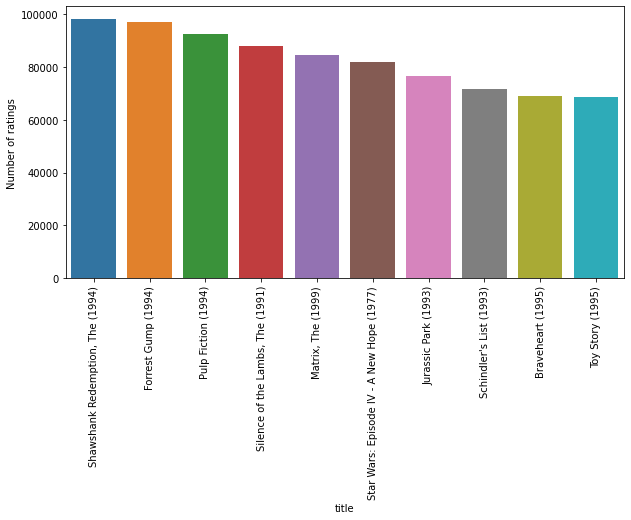

In [63]:
## Code insperation taken from https://datatofish.com/count-duplicates-pandas/
df_ratings_pivot = df_ratings.pivot_table(columns=["movieId"], aggfunc="size").to_frame()
df_ratings_pivot = df_ratings_pivot.reset_index()
df_ratings_pivot = df_ratings_pivot.rename({0: "Number of ratings"}, axis = "columns")
df_ratings_pivot = df_ratings_pivot.sort_values(ascending = False, by = "Number of ratings")
ten_most_rated_movieId = df_ratings_pivot["movieId"].head(10).to_list()
ten_most_rated_movies = df_movies[df_movies["movieId"].isin(ten_most_rated_movieId)]
most_rated_movies = pd.concat([df_ratings_pivot["Number of ratings"].head(10), ten_most_rated_movies["title"]], axis=1)
plt.figure(figsize=(10,5))
sns.barplot(data = most_rated_movies, x="title", y="Number of ratings")
plt.xticks(rotation=90)
plt.show()

#### Mean rating on the 10 most rated movies

In [64]:
movieId_index = 0
mean_rating_list = []

for _ in ten_most_rated_movieId:
    specifed_movie = df_ratings[ # Takes out one movie from a give list and df in this case the one of the ten_most_rated_movies
    df_ratings["movieId"].isin([ten_most_rated_movieId[movieId_index]])
    ]

    rating_count = ( ## Takes out the amout of total entries
        specifed_movie.pivot_table(columns=["movieId"], aggfunc="size")
        .to_frame()
        .reset_index()
        .rename({0: "number_of_entries"}, axis="columns")
    )

    total_rating = specifed_movie["rating"].sum()
    rating_count = rating_count["number_of_entries"].to_list()
    mean_rating = total_rating/ rating_count[0]
    mean_rating_list.append(mean_rating)

    movieId_index += 1

most_rated_movies["movieId"] = ten_most_rated_movieId
most_rated_movies["mean_rating"] = mean_rating_list

In [172]:
most_rated_movies.reset_index(drop=True)

,Number of ratings,title,movieId,mean_rating
0,97999,"Shawshank Redemption, The (1994)",318,4.424188
1,97040,Forrest Gump (1994),356,4.056585
2,92406,Pulp Fiction (1994),296,4.173971
3,87899,"Silence of the Lambs, The (1991)",593,4.151412
4,84545,"Matrix, The (1999)",2571,4.149695
5,81815,Star Wars: Episode IV - A New Hope (1977),260,4.120455
6,76451,Jurassic Park (1993),480,3.665034
7,71516,Schindler's List (1993),527,4.257502
8,68803,Braveheart (1995),110,4.008481
9,68469,Toy Story (1995),1,3.886649


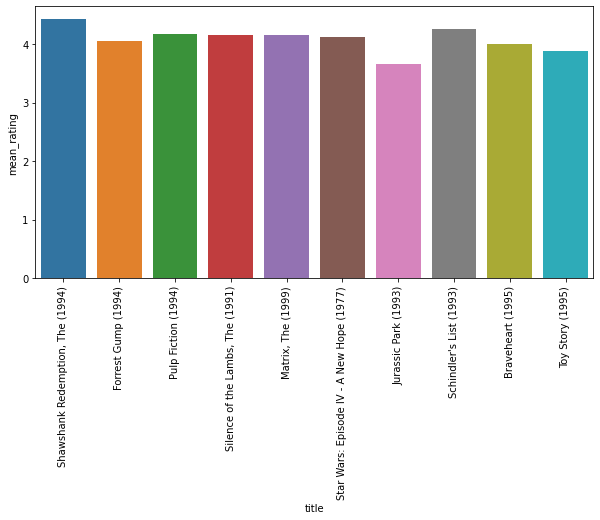

In [170]:
plt.figure(figsize=(10,5))
sns.barplot(data = most_rated_movies, x="title", y="mean_rating")
plt.xticks(rotation=90)
plt.show()

#### Plot for movies per year

In [138]:
list_of_year = ["187", "188", "189", "190", "191", "192", "193", "194", "195", "196", "197", "198", "199", "200", "201"] 
## Taken from https://datascienceparichay.com/article/pandas-search-for-string-in-dataframe-column/

for i, char in enumerate(list_of_year):
    movies_per_year = df_movies[df_movies["title"].str.contains(f"\({list_of_year[i]}")]
    movies_per_year["Decade"] = char + "0"
    if i == 0:
        movies_with_years = pd.DataFrame(movies_per_year)
    else:
        movies_with_years = pd.concat([movies_with_years, movies_per_year], axis=0)


movies_with_years = movies_with_years.reset_index(drop=True)
df_decades = movies_with_years.pivot_table(columns=["Decade"], aggfunc="size").to_frame()
df_decades = df_decades.reset_index().rename({0: "Occurance_in_data"}, axis = 1)

C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_12716\3197736692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0"
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_12716\3197736692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_per_year["Decade"] = char + "0"
C:\Users\FabianAndersson-AIU2\AppData\Local\Temp\ipykernel_12716\3197736692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

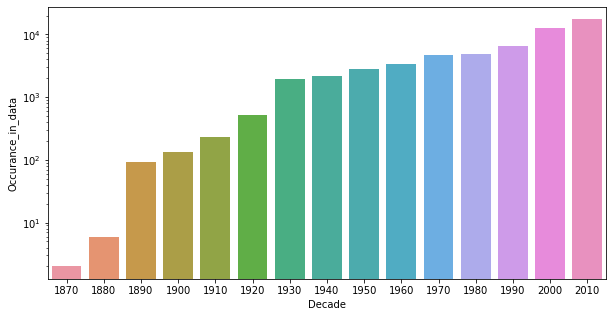

In [147]:
plt.figure(figsize=(10,5))
decade_plot = sns.barplot(data = df_decades, x="Decade", y="Occurance_in_data")
decade_plot.set(yscale="log")
plt.show()

#### Number ratings on movieId

<AxesSubplot:xlabel='movieId', ylabel='Number of ratings'>

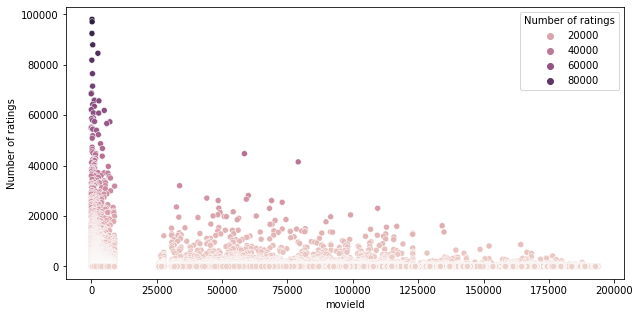

In [165]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df_ratings_pivot, x="movieId", y="Number of ratings", hue = "Number of ratings")